<a href="https://colab.research.google.com/github/wkvanderveen/Simple-Clothing-Classifier/blob/master/TensorFlowTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Clothing Types
### A First Test with Google Colab, GitHub, and Keras integration

Since this is my first time working with Google Colab, it is helpful to see a list of shortkeys:

---
* Show keyboard shortcuts: Ctrl/Cmd M H 
* Insert code cell above: Ctrl/Cmd M A
* Insert code cell below: Ctrl/Cmd M B
* Delete cell/selection: Ctrl/Cmd M D
* Interrupt execution: Ctrl/Cmd M I
* Convert to code cell: Ctrl/Cmd M Y
* Convert to text cell: Ctrl/Cmd M M
* Split at cursor: Ctrl/Cmd M -

---

## Imports

In [19]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


## Loading the data

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

We see that the data is in the range [0, 255]. The network will perform better for normalized vectors, so we need to preprocess the images first.

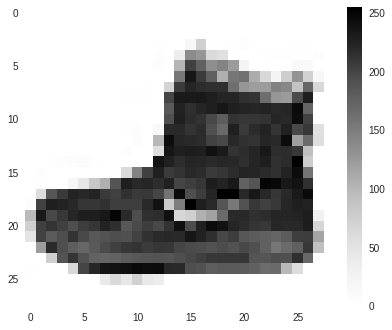

In [22]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

## Preprocessing

### Normalizing the images

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## Exploring the data set

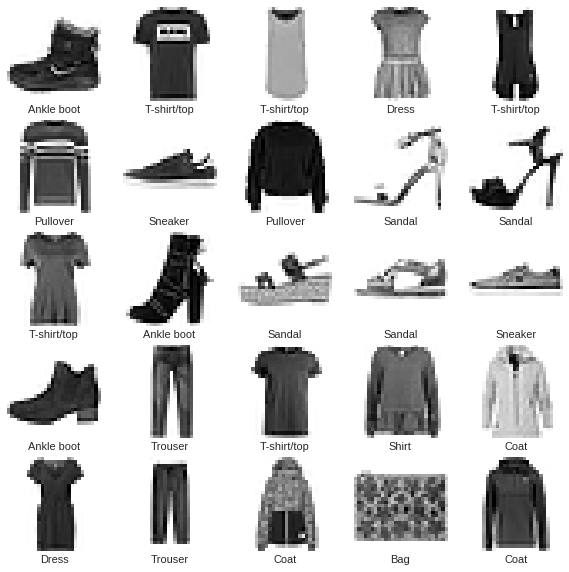

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Building the model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [27]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.5012 - acc: 0.8254
Epoch 2/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.3721 - acc: 0.8660
Epoch 3/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.3346 - acc: 0.8781
Epoch 4/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.3128 - acc: 0.8848
Epoch 5/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.2926 - acc: 0.8918


## Testing the model

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 41us/step
Test accuracy: 0.8747


## Predicting test images

In [0]:
predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array = predictions_array[i]
  true_label = true_label[i]
  img = img[i]
  
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Show prediction array for single image

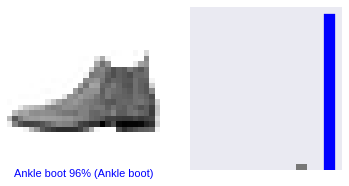

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

### Show prediction array for multiple images

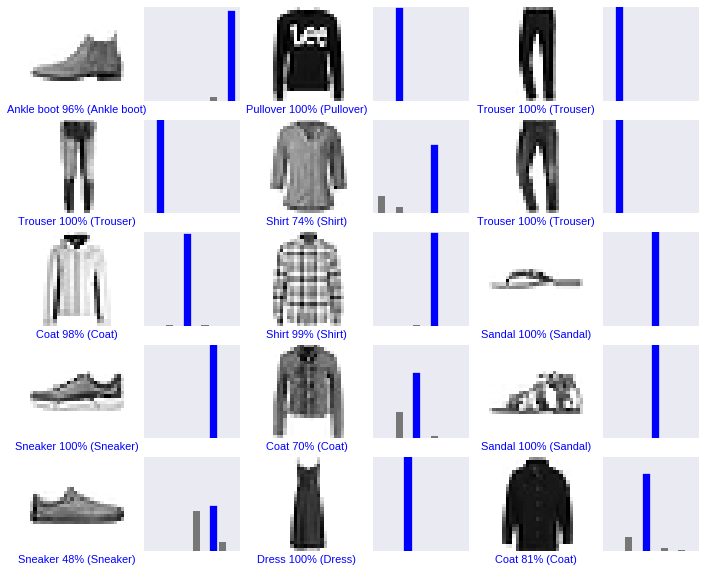

In [31]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

### Predict single image's class label

9

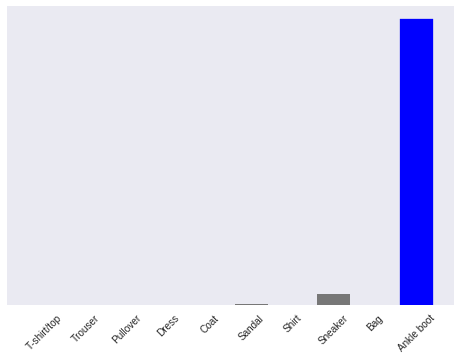

In [32]:
# Grab an image from the test dataset
img = test_images[0]

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

predictions_single = model.predict(img)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])